In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# Configure plot style
plt.style.use("seaborn-v0_8")
sns.set_palette("Set2")

In [3]:
print(os.getcwd())

/Users/sromee/Documents/AIPI-510/AIPI-510-Proj-1/college-scorecard-roi-storytelling/notebooks


In [4]:
# Load processed data
field_of_study = pd.read_csv("data/sample/field_of_study_processed_sample.csv")


In [5]:
field_of_study.head()

,EARN_MDN_5YR,DEBT_ALL_STGP_ANY_MDN,DEBT_ALL_STGP_EVAL_MDN,DEBT_ALL_STGP_ANY_MDN10YRPAY,DEBT_ALL_STGP_EVAL_MDN10YRPAY,CIPCODE,CIPDESC,CREDLEV,CREDDESC,INSTNM,...,CONTROL,ROI_EARNINGS_TO_DEBT,DEBT_TO_INCOME_RATIO,MONTHLY_PAYMENT_PCT,PAYBACK_YEARS,CREDENTIAL_LEVEL_NAME,CIP_2DIGIT,MAJOR_FIELD,ROI_CATEGORY,AFFORDABILITY
0,63192.0,18028.0,18028.0,191.0,191.0,2401,"Liberal Arts and Sciences, General Studies and...",3,Bachelor's Degree,Wayne State University,...,Public,3.505214,0.285289,3.627041,0.285289,Bachelor Degree,24,Other,Good (3-5),Very Affordable (<10%)
1,37094.0,11371.0,10532.0,121.0,112.0,3017,Behavioral Sciences.,2,Associate's Degree,Vincennes University,...,Public,3.262158,0.306546,3.914380,0.306546,Associate Degree,30,Other,Good (3-5),Very Affordable (<10%)
2,51042.0,31000.0,21358.0,329.0,226.0,5100,"Health Services/Allied Health/Health Sciences,...",3,Bachelor's Degree,Lamar University,...,Public,1.646516,0.607343,7.734807,0.607343,Bachelor Degree,51,Health Professions,Below Average (1-2),Very Affordable (<10%)
3,23528.0,6951.0,6333.0,74.0,67.0,1204,Cosmetology and Related Personal Grooming Serv...,1,Undergraduate Certificate or Diploma,Federico Beauty Institute,...,"Private, for-profit",3.384837,0.295435,3.774226,0.295435,Undergraduate Certificate,12,Other,Good (3-5),Very Affordable (<10%)
4,79751.0,15200.0,11895.0,161.0,126.0,5138,"Registered Nursing, Nursing Administration, Nu...",2,Associate's Degree,Texarkana College,...,Public,5.246776,0.190593,2.422540,0.190593,Associate Degree,51,Health Professions,Excellent (>5),Very Affordable (<10%)


# Get an Overview of the Data:

In [6]:
# renaming ambiguous variable names

field_of_study = field_of_study.rename(columns={
    "CIPDESC": "DEG_DEPT",
    "CONTROL": "PUBL_OR_PRIV",
    "INSTNM": "UNI_NAME",
    "IPEDSCOUNT2": "CLASS_SIZE"
})

In [7]:
field_of_study["PUBL_OR_PRIV"] = (
    field_of_study["PUBL_OR_PRIV"]
    .replace({
        "Private, nonprofit": "Private non-profit",
        "Private, for-profit": "Private for-profit"
    })
)

In [8]:
field_of_study.shape

(1000, 21)

Calling info() on the data is useful to see each column name, the data type & the number of non-null values 

In [9]:
field_of_study.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EARN_MDN_5YR                   1000 non-null   float64
 1   DEBT_ALL_STGP_ANY_MDN          1000 non-null   float64
 2   DEBT_ALL_STGP_EVAL_MDN         956 non-null    float64
 3   DEBT_ALL_STGP_ANY_MDN10YRPAY   1000 non-null   float64
 4   DEBT_ALL_STGP_EVAL_MDN10YRPAY  956 non-null    float64
 5   CIPCODE                        1000 non-null   int64  
 6   DEG_DEPT                       1000 non-null   object 
 7   CREDLEV                        1000 non-null   int64  
 8   CREDDESC                       1000 non-null   object 
 9   UNI_NAME                       1000 non-null   object 
 10  CLASS_SIZE                     1000 non-null   float64
 11  PUBL_OR_PRIV                   1000 non-null   object 
 12  ROI_EARNINGS_TO_DEBT           1000 non-null   fl

# Summary Statistics of Quantitative Columns:

describe() with the all parameter is useful since I can see descriptive statistucs of each variable, including the count, mean, standard deviation, and more.

In [10]:
# descriptive statistics
field_of_study.describe(include="all")

,EARN_MDN_5YR,DEBT_ALL_STGP_ANY_MDN,DEBT_ALL_STGP_EVAL_MDN,DEBT_ALL_STGP_ANY_MDN10YRPAY,DEBT_ALL_STGP_EVAL_MDN10YRPAY,CIPCODE,DEG_DEPT,CREDLEV,CREDDESC,UNI_NAME,...,PUBL_OR_PRIV,ROI_EARNINGS_TO_DEBT,DEBT_TO_INCOME_RATIO,MONTHLY_PAYMENT_PCT,PAYBACK_YEARS,CREDENTIAL_LEVEL_NAME,CIP_2DIGIT,MAJOR_FIELD,ROI_CATEGORY,AFFORDABILITY
count,1000.000000,1000.000000,956.000000,1000.000000,956.000000,1000.000000,1000,1000.000000,1000,1000,...,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000.000000,1000,1000,1000
unique,NaN,NaN,NaN,NaN,NaN,NaN,154,NaN,3,738,...,3,NaN,NaN,NaN,NaN,3,NaN,16,5,3
top,NaN,NaN,NaN,NaN,NaN,NaN,"Registered Nursing, Nursing Administration, Nu...",NaN,Bachelor's Degree,The Pennsylvania State University,...,Public,NaN,NaN,NaN,NaN,Bachelor Degree,NaN,Other,Average (2-3),Very Affordable (<10%)
freq,NaN,NaN,NaN,NaN,NaN,NaN,55,NaN,718,7,...,633,NaN,NaN,NaN,NaN,718,NaN,283,339,975
mean,58657.552000,21548.190000,19802.866109,228.447000,209.941423,3528.521000,NaN,2.585000,NaN,NaN,...,NaN,3.061762,0.399067,5.077081,0.399067,NaN,39.352000,NaN,NaN,NaN
std,21692.468719,7646.648217,6724.542171,81.053099,71.265485,1724.469768,NaN,0.713642,NaN,NaN,...,NaN,1.616021,0.170869,2.173581,0.170869,NaN,18.289741,NaN,NaN,NaN
min,12963.000000,3167.000000,3166.000000,34.000000,34.000000,101.000000,NaN,1.000000,NaN,NaN,...,NaN,0.812296,0.059709,0.755594,0.059709,NaN,10.000000,NaN,NaN,NaN
25%,43921.000000,16246.000000,15000.000000,172.500000,159.000000,1505.500000,NaN,2.000000,NaN,NaN,...,NaN,1.995978,0.276027,3.510157,0.276027,NaN,24.000000,NaN,NaN,NaN
50%,54871.500000,23174.000000,20885.500000,245.500000,221.500000,4407.000000,NaN,3.000000,NaN,NaN,...,NaN,2.690235,0.371715,4.725774,0.371715,NaN,45.000000,NaN,NaN,NaN
75%,70429.250000,26808.000000,25000.000000,284.000000,265.000000,5109.000000,NaN,3.000000,NaN,NaN,...,NaN,3.622832,0.501008,6.372444,0.501008,NaN,51.000000,NaN,NaN,NaN


Finding the value counts of categorical feature variables is useful because it allows us to see how the values are distributed within the dataset. If certain variables have class imbalances, that will help us decide whether to exclude them or give less importance to them whem coming up with conclusions about the data.

#### Examples of variables that have class imbalance are:

CREDDESC and CREDENTIAL_LEVEL_NAME have 718 out of 1000 values  = "Bachelor's Degree" which is almost 70% of values equaliing the same value. However, this still is useful information that the majority of observations correspond to bachelor's degree students.

MAJOR_FIELD has the most of its values (283) correspond to the vague "Other" category. While this is concerning, it is not glaring enough of a class imbalance to consider removing the field.

AFFORDABILITY has 975 out of 1000 variables  = "Very Affordable", which could be removed since almost all observations have the same value.

In [11]:
# value counts for categorical features
for col in field_of_study.select_dtypes(include="object").columns:
    print(f"\nValue counts for {col}:\n", field_of_study[col].value_counts().head())


Value counts for DEG_DEPT:
 DEG_DEPT
Registered Nursing, Nursing Administration, Nursing Research and Clinical Nursing.    55
Business Administration, Management and Operations.                                   44
Liberal Arts and Sciences, General Studies and Humanities.                            38
Allied Health and Medical Assisting Services.                                         33
Cosmetology and Related Personal Grooming Services.                                   29
Name: count, dtype: int64

Value counts for CREDDESC:
 CREDDESC
Bachelor's Degree                       718
Associate's Degree                      149
Undergraduate Certificate or Diploma    133
Name: count, dtype: int64

Value counts for UNI_NAME:
 UNI_NAME
The Pennsylvania State University            7
Illinois State University                    6
University of Arizona                        5
University of North Carolina at Charlotte    5
Rowan University                             5
Name: count, dtype: in

# Removing Redundant Variables:
Earnings and Debt

EARN_MDN_5YR = Median earnings 5 years after graduating
  Keep. This is the outcome variable for ROI.

DEBT_ALL_STGP_ANY_MDN = Median total federal debt (all loans)

DEBT_ALL_STGP_EVAL_MDN = Median total federal debt (loans only at this school)

  These 2 variables are highly correlated since each person in this dataset only attends 1 school. For simplicity, we decided to keep DEBT_ALL_STGP_ANY_MDN because it covers all debt & so DEBT_ALL_STGP_EVAL_MDN will be removed.

  DEBT_ALL_STGP_ANY_MDN10YRPAY and DEBT_ALL_STGP_EVAL_MDN10YRPAY will be removed for similar reasons.


Field of Study Identifiers

CIPDESC = text description of the CIP code (for example, "Computer Science")
  You do not need both.

  Keep CIPDESC for easier readability than CIPCODE.

CREDLEV = numeric credential level

CREDDESC = text description (for example, "Bachelor’s degree")
  Same redundancy.

  Keep CREDDESC for easier readability & CREDLEV will be dropped.

Institutional Variables

INSTNM = Institution name
  Is useful to do comparisons by institution.

IPEDSCOUNT2 = Number of graduates in that field
  Is useful to show how common a field is & to give context to ROI outliers.

CONTROL = public / private nonprofit / for-profit
  This is useful for comparing different sub-groups.


These variables are redundant for ROI storytelling & hence will be dropped:

DEBT_ALL_STGP_EVAL_MDN
DEBT_ALL_STGP_ANY_MDN10YRPAY
DEBT_ALL_STGP_EVAL_MDN10YRPAY
CIPCODE
CREDLEV



In [12]:
# remove redundant variables
field_of_study = field_of_study.drop(
    columns=[
        "DEBT_ALL_STGP_EVAL_MDN",
        "DEBT_ALL_STGP_ANY_MDN10YRPAY",
        "DEBT_ALL_STGP_EVAL_MDN10YRPAY",
        "CIPCODE",
        "CREDLEV",
        "CIP_2DIGIT",
        "AFFORDABILITY",
        "CREDDESC"
        
    ],
    errors="ignore"  # prevents errors if a certain column is missing
)


In [13]:
field_of_study.columns

Index(['EARN_MDN_5YR', 'DEBT_ALL_STGP_ANY_MDN', 'DEG_DEPT', 'UNI_NAME',
       'CLASS_SIZE', 'PUBL_OR_PRIV', 'ROI_EARNINGS_TO_DEBT',
       'DEBT_TO_INCOME_RATIO', 'MONTHLY_PAYMENT_PCT', 'PAYBACK_YEARS',
       'CREDENTIAL_LEVEL_NAME', 'MAJOR_FIELD', 'ROI_CATEGORY'],
      dtype='object')

In [14]:
field_of_study.head()

,EARN_MDN_5YR,DEBT_ALL_STGP_ANY_MDN,DEG_DEPT,UNI_NAME,CLASS_SIZE,PUBL_OR_PRIV,ROI_EARNINGS_TO_DEBT,DEBT_TO_INCOME_RATIO,MONTHLY_PAYMENT_PCT,PAYBACK_YEARS,CREDENTIAL_LEVEL_NAME,MAJOR_FIELD,ROI_CATEGORY
0,63192.0,18028.0,"Liberal Arts and Sciences, General Studies and...",Wayne State University,14.0,Public,3.505214,0.285289,3.627041,0.285289,Bachelor Degree,Other,Good (3-5)
1,37094.0,11371.0,Behavioral Sciences.,Vincennes University,32.0,Public,3.262158,0.306546,3.914380,0.306546,Associate Degree,Other,Good (3-5)
2,51042.0,31000.0,"Health Services/Allied Health/Health Sciences,...",Lamar University,21.0,Public,1.646516,0.607343,7.734807,0.607343,Bachelor Degree,Health Professions,Below Average (1-2)
3,23528.0,6951.0,Cosmetology and Related Personal Grooming Serv...,Federico Beauty Institute,232.0,Private for-profit,3.384837,0.295435,3.774226,0.295435,Undergraduate Certificate,Other,Good (3-5)
4,79751.0,15200.0,"Registered Nursing, Nursing Administration, Nu...",Texarkana College,68.0,Public,5.246776,0.190593,2.422540,0.190593,Associate Degree,Health Professions,Excellent (>5)


In [15]:
# find the missing values
field_of_study.isnull().sum()

EARN_MDN_5YR             0
DEBT_ALL_STGP_ANY_MDN    0
DEG_DEPT                 0
UNI_NAME                 0
CLASS_SIZE               0
PUBL_OR_PRIV             0
ROI_EARNINGS_TO_DEBT     0
DEBT_TO_INCOME_RATIO     0
MONTHLY_PAYMENT_PCT      0
PAYBACK_YEARS            0
CREDENTIAL_LEVEL_NAME    0
MAJOR_FIELD              0
ROI_CATEGORY             0
dtype: int64

After removing redundant varaibles, this dataset has no missing values

# Identifying Multicollinearity Among Variables:

Using Variance Inflation Factor (VIF) values to remove more variable(s) if necessary. This is a more throough way to identify multicollinearity than just finding high correlation values.

In [16]:
# only numeric features
features = [
    "EARN_MDN_5YR",
    "DEBT_ALL_STGP_ANY_MDN",
    "CLASS_SIZE",
    "ROI_EARNINGS_TO_DEBT",
    "DEBT_TO_INCOME_RATIO",
    "MONTHLY_PAYMENT_PCT",
    "PAYBACK_YEARS"
]

X = field_of_study[features].dropna()

# This adds an intercept 
X_const = sm.add_constant(X)

# The purpose of this intercept is to add a constant term (a bias) to the regression model
# so that the best-fit line doesn’t have to start at the origin (0, 0)

# VIF value calculations:

vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X_const.values, i+1) 
                 for i in range(len(X.columns))] # +1 because of the intercept


/Users/sromee/Documents/AIPI-510/AIPI-510-Proj-1/college-scorecard-roi-storytelling/.venv/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [17]:
print(vif_df.sort_values("VIF", ascending=False))

                 Feature           VIF
4   DEBT_TO_INCOME_RATIO           inf
6          PAYBACK_YEARS           inf
5    MONTHLY_PAYMENT_PCT  8.432783e+04
1  DEBT_ALL_STGP_ANY_MDN  8.338423e+00
0           EARN_MDN_5YR  6.638922e+00
3   ROI_EARNINGS_TO_DEBT  4.184631e+00
2             CLASS_SIZE  1.020268e+00


In [18]:
def reduce_vif(X, thresh=10.0):
    dropped = True
    while dropped:
        dropped = False
        X_const = sm.add_constant(X)
        vif = [variance_inflation_factor(X_const.values, i+1) for i in range(len(X.columns))]
        max_vif = max(vif)
        if max_vif > thresh:
            maxloc = vif.index(max_vif)
            print(f"Dropping '{X.columns[maxloc]}' with VIF={max_vif:.2f}")
            X = X.drop(columns=[X.columns[maxloc]])
            dropped = True
    return X


In [19]:
# apply this function onto the features
X_reduced = reduce_vif(X, thresh=10.0)

# remaining features after VIF reduction
remaining_features = X_reduced.columns.tolist()

print("Remaining features:", remaining_features)

Dropping 'DEBT_TO_INCOME_RATIO' with VIF=inf
Dropping 'MONTHLY_PAYMENT_PCT' with VIF=84327.83
Remaining features: ['EARN_MDN_5YR', 'DEBT_ALL_STGP_ANY_MDN', 'CLASS_SIZE', 'ROI_EARNINGS_TO_DEBT', 'PAYBACK_YEARS']


/Users/sromee/Documents/AIPI-510/AIPI-510-Proj-1/college-scorecard-roi-storytelling/.venv/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [20]:
# created a new dataframe with original qualtitative columns plus the reduced quantitiative features

field_of_study_reduced = field_of_study[remaining_features + 
    ["DEG_DEPT", "UNI_NAME", "PUBL_OR_PRIV","CREDENTIAL_LEVEL_NAME", "MAJOR_FIELD", "ROI_CATEGORY"]]


In [21]:
field_of_study_reduced.head()

,EARN_MDN_5YR,DEBT_ALL_STGP_ANY_MDN,CLASS_SIZE,ROI_EARNINGS_TO_DEBT,PAYBACK_YEARS,DEG_DEPT,UNI_NAME,PUBL_OR_PRIV,CREDENTIAL_LEVEL_NAME,MAJOR_FIELD,ROI_CATEGORY
0,63192.0,18028.0,14.0,3.505214,0.285289,"Liberal Arts and Sciences, General Studies and...",Wayne State University,Public,Bachelor Degree,Other,Good (3-5)
1,37094.0,11371.0,32.0,3.262158,0.306546,Behavioral Sciences.,Vincennes University,Public,Associate Degree,Other,Good (3-5)
2,51042.0,31000.0,21.0,1.646516,0.607343,"Health Services/Allied Health/Health Sciences,...",Lamar University,Public,Bachelor Degree,Health Professions,Below Average (1-2)
3,23528.0,6951.0,232.0,3.384837,0.295435,Cosmetology and Related Personal Grooming Serv...,Federico Beauty Institute,Private for-profit,Undergraduate Certificate,Other,Good (3-5)
4,79751.0,15200.0,68.0,5.246776,0.190593,"Registered Nursing, Nursing Administration, Nu...",Texarkana College,Public,Associate Degree,Health Professions,Excellent (>5)


# Other Visualizations:

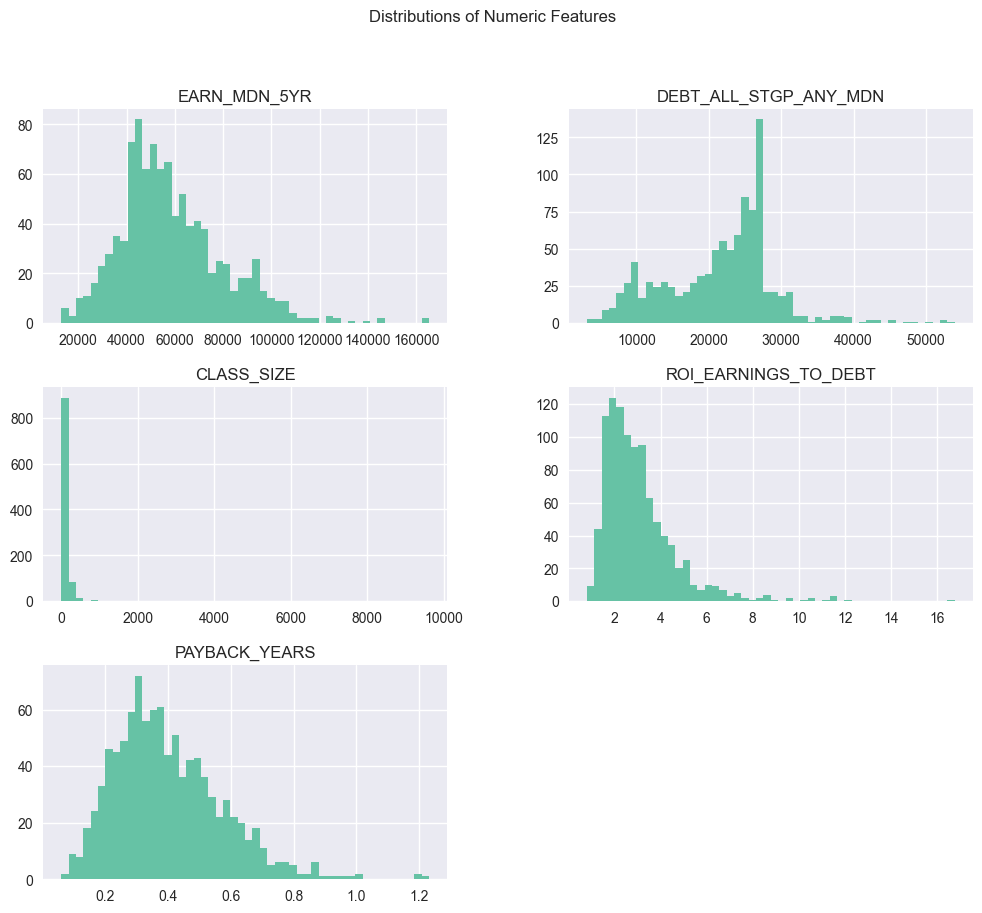

In [22]:
# numeric distribution
field_of_study_reduced.hist(bins=50, figsize=(12, 10))
plt.suptitle("Distributions of Numeric Features")
plt.show()

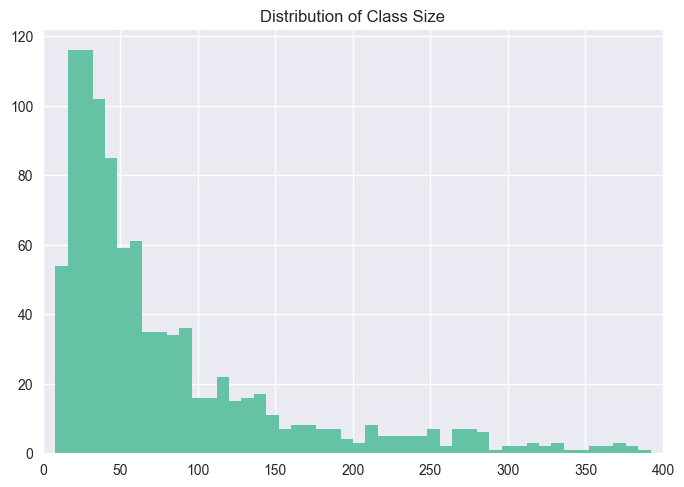

In [23]:
# zoomed in plot of class size distribution of values:

field_of_study_reduced["CLASS_SIZE"].hist(bins=50, range=(0, 400))
plt.title("Distribution of Class Size")
plt.xlim(0, 400)
plt.show()


In [24]:
field_of_study_reduced.columns

Index(['EARN_MDN_5YR', 'DEBT_ALL_STGP_ANY_MDN', 'CLASS_SIZE',
       'ROI_EARNINGS_TO_DEBT', 'PAYBACK_YEARS', 'DEG_DEPT', 'UNI_NAME',
       'PUBL_OR_PRIV', 'CREDENTIAL_LEVEL_NAME', 'MAJOR_FIELD', 'ROI_CATEGORY'],
      dtype='object')

# Feature Engineering With College Scorecard Names:

#### ROI Numeric Score Calculation:

In [25]:
# ROI numeric score has been defined as an earnings-to-debt ratio

field_of_study_reduced["ROI_Numeric_Score"] = (field_of_study_reduced["EARN_MDN_5YR"] / field_of_study_reduced["DEBT_ALL_STGP_ANY_MDN"])

# descriptive statistics of new ROI numeric score
print(field_of_study_reduced["ROI_Numeric_Score"].describe())

count    1000.000000
mean        3.061762
std         1.616021
min         0.812296
25%         1.995978
50%         2.690235
75%         3.622832
max        16.747818
Name: ROI_Numeric_Score, dtype: float64


/var/folders/_p/wr8rlmq53xlb17pvs7p0hsfm0000gn/T/ipykernel_2066/3998435549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  field_of_study_reduced["ROI_Numeric_Score"] = (field_of_study_reduced["EARN_MDN_5YR"] / field_of_study_reduced["DEBT_ALL_STGP_ANY_MDN"])


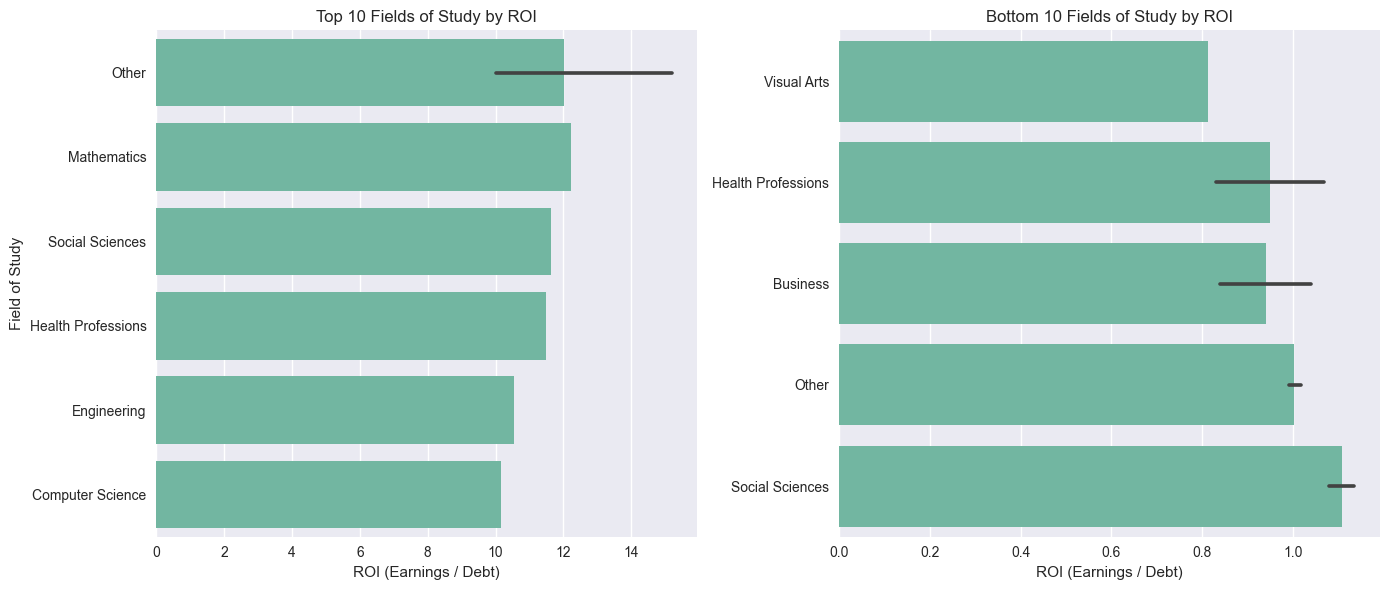

In [26]:
# top & bottom ROI fields
top_roi = field_of_study_reduced.sort_values("ROI_Numeric_Score", ascending=False).head(10)
bottom_roi = field_of_study_reduced.sort_values("ROI_Numeric_Score", ascending=True).head(10)

# side by side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharex=False)

sns.barplot(x="ROI_Numeric_Score", y="MAJOR_FIELD", data=top_roi, ax=axes[0])
axes[0].set_title("Top 10 Fields of Study by ROI")
axes[0].set_xlabel("ROI (Earnings / Debt)")
axes[0].set_ylabel("Field of Study")

sns.barplot(x="ROI_Numeric_Score", y="MAJOR_FIELD", data=bottom_roi, ax=axes[1])
axes[1].set_title("Bottom 10 Fields of Study by ROI")
axes[1].set_xlabel("ROI (Earnings / Debt)")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

# Storytelling Visualizations

#### 1. Earnings vs. Debt Scatterplot:

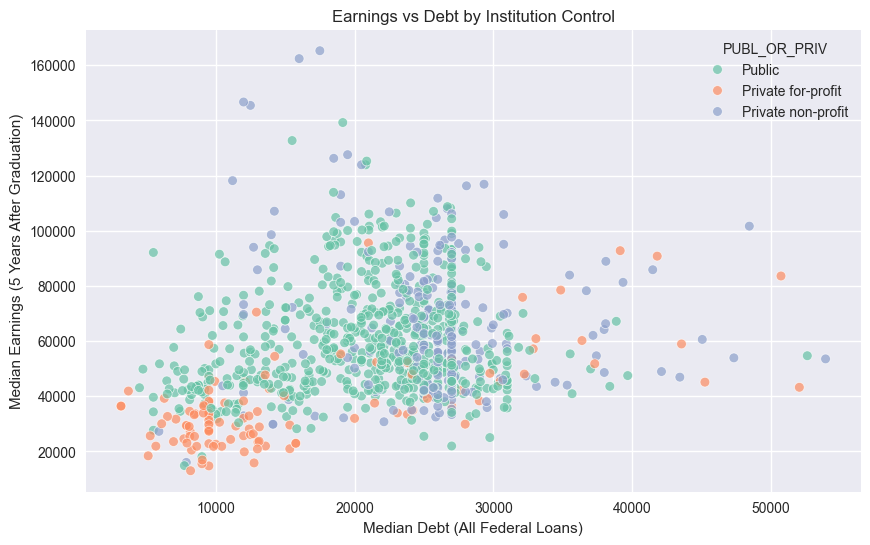

In [27]:
if {"EARN_MDN_5YR", "DEBT_ALL_STGP_ANY_MDN"}.issubset(field_of_study_reduced.columns):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x="DEBT_ALL_STGP_ANY_MDN",
        y="EARN_MDN_5YR",
        hue="PUBL_OR_PRIV",  # compare based on institution type (public/private/for-profit)
        data=field_of_study_reduced,
        alpha=0.7)

    plt.title("Earnings vs Debt by Institution Control")
    plt.xlabel("Median Debt (All Federal Loans)")
    plt.ylabel("Median Earnings (5 Years After Graduation)")
    plt.show()


#### 2. ROI by Credential Level:

This plot illustrates how ROI varies based on credential level. This is useful to see if bachelor’s degrees deliver better ROI than associate’s.

/var/folders/_p/wr8rlmq53xlb17pvs7p0hsfm0000gn/T/ipykernel_2066/3429266370.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="CREDENTIAL_LEVEL_NAME",


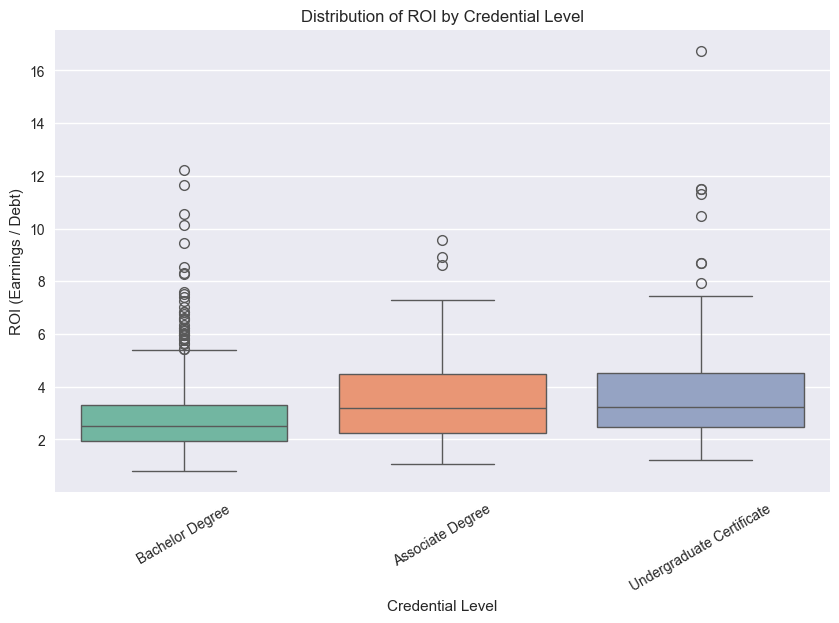

In [28]:
if {"ROI_Numeric_Score", "CREDENTIAL_LEVEL_NAME"}.issubset(field_of_study_reduced.columns):

    plt.figure(figsize=(10, 6))
    sns.boxplot(x="CREDENTIAL_LEVEL_NAME",
        y="ROI_Numeric_Score",
        data=field_of_study_reduced,
        palette="Set2")

    plt.title("Distribution of ROI by Credential Level")
    plt.xlabel("Credential Level")
    plt.ylabel("ROI (Earnings / Debt)")
    plt.xticks(rotation=30)
    plt.show()


#### 3. ROI by University Type (Public/Private):

This shows whether the type of university (public, private) impacts ROI. This helps understand structural differences between public, private, and for-profit institutions.

public universities: Funded heavily by state governments, lower tuition (usually for in-state students), their mission is broad public access

private nonprofit universities: Funded by tuition, endowments, and donations; is not owned by individuals, mission is education/research, often has higher tuition but may give large amounts of aid. Because most private universities in the U.S. are legally designated as non-profit institutions.

for-profit universities: run as businesses to generate profit for owners/shareholders; relies largely on tuition (often from federal loans), usually leads to higher student debt and weaker outcomes


/var/folders/_p/wr8rlmq53xlb17pvs7p0hsfm0000gn/T/ipykernel_2066/1631662467.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


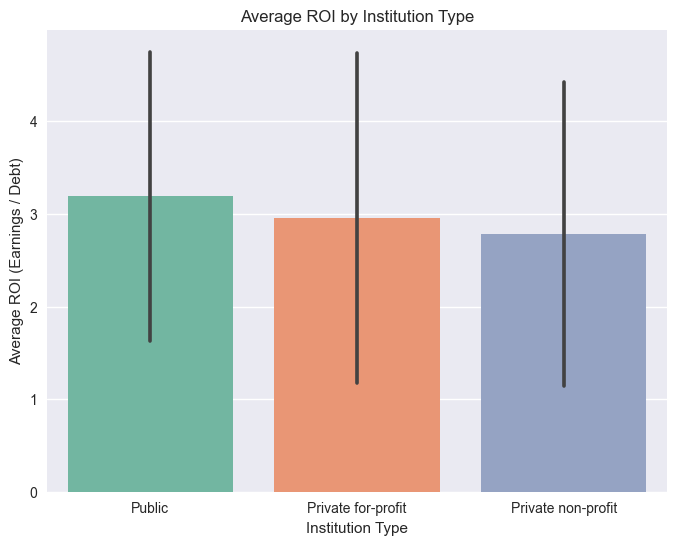

In [29]:
if {"ROI_Numeric_Score", "PUBL_OR_PRIV"}.issubset(field_of_study_reduced.columns):
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x="PUBL_OR_PRIV",
        y="ROI_Numeric_Score",
        data=field_of_study_reduced,
        estimator="mean",
        errorbar="sd",
        palette="Set2"
    )
    plt.title("Average ROI by Institution Type")
    plt.xlabel("Institution Type")
    plt.ylabel("Average ROI (Earnings / Debt)")
    plt.show()

#### Ethical Considerations & Limitations:
- Data may not represent all schools equally
- ROI metric ignores quality of life, job satisfaction, or financial aid
- Salaries vary regionally & by experience
- Tuition may not include living costs